
# INE PREVISIONES  


### Llibreries i càrrega de dades

In [5]:
"""Libreries que poden ser necessàries"""

# Manejo de datos
import pandas as pd                 # Análisis y manipulación de datos en tablas
import numpy as np                  # Cálculos numéricos y matrices
import os                           # Gestión de rutas de archivos

# Visualización de datos
import matplotlib.pyplot as plt     # Gráficos básicos en 2D
import seaborn as sns               # Gráficos estadísticos mejorados
import plotly.express as px         # Gráficos interactivos simplificados
import plotly.graph_objects as go   # Control avanzado de gráficos en Plotly
import plotly.io as pio             # Interfaz de entrada/salida de Plotly
import squarify                     # Visualización de diagramas de "treemap"
from plottable import Table         # Visualización de tablas
import matplotlib.colors as mcolors # Colores y mapas de colores

# Clustering y agrupamiento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes


In [6]:
# %pip install plottable
# %pip install kmodes


In [7]:
# Load the CSV files
men_df = pd.read_csv("../Data/INE/INE hombres - Hombres.csv", index_col=0)



In [8]:
women_df = pd.read_csv("../Data/INE/INE mujeres - Mujeres.csv", index_col=0)

Paleta de colors

In [9]:
custom_palette = ["#AABBC8", "#2CCED1", "#5F6F81", "#DCE3EA", "#2E2F36"]  
sns.set_palette(sns.color_palette(custom_palette))

### Extracte KPIs

# Anàlisi 

### Piràmide poblacional 2025

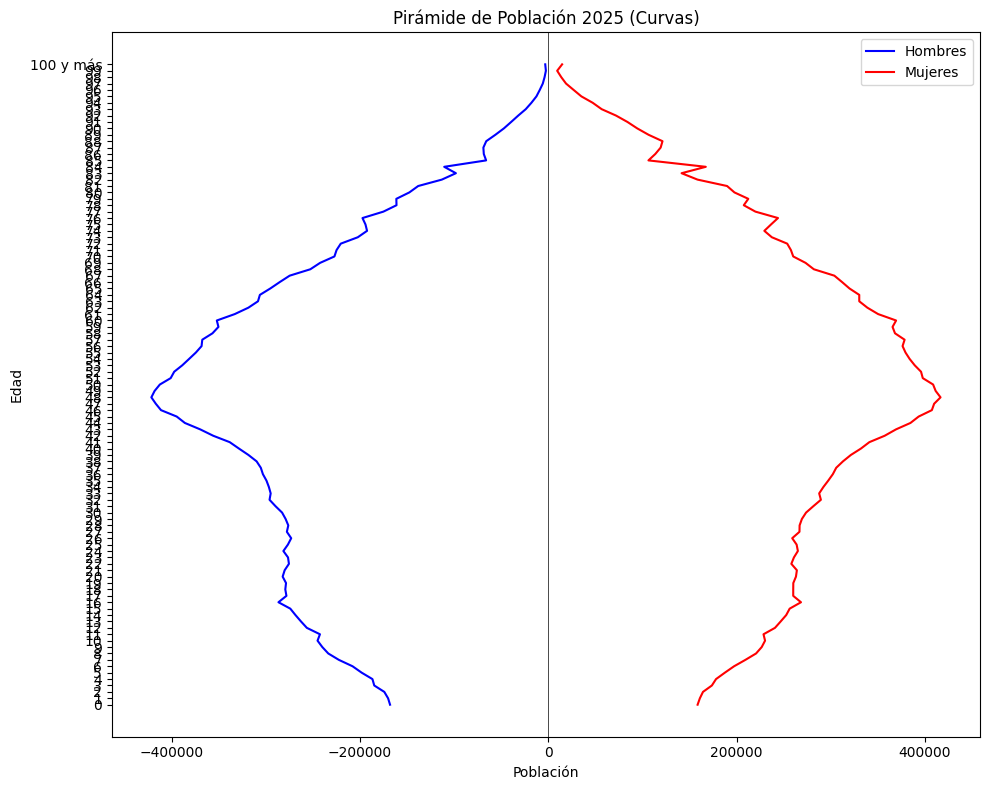

In [10]:

# Extract 2025 data
men_2025 = men_df['2025']
women_2025 = women_df['2025']

# Age groups as they are (youngest to oldest)
ages = men_2025.index
men_values = -men_2025.values  # Negative for left side
women_values = women_2025.values

# Plotting
plt.figure(figsize=(10, 8))

plt.plot(-men_2025.values, ages, color='blue', label='Hombres')   # Negative for left side
plt.plot(women_2025.values, ages, color='red', label='Mujeres')   # Positive for right side

plt.axvline(0, color='black', linewidth=0.5)  # Center line
plt.xlabel('Población')
plt.ylabel('Edad')
plt.title('Pirámide de Población 2025 (Curvas)')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


### Piràmide poblacional 2030


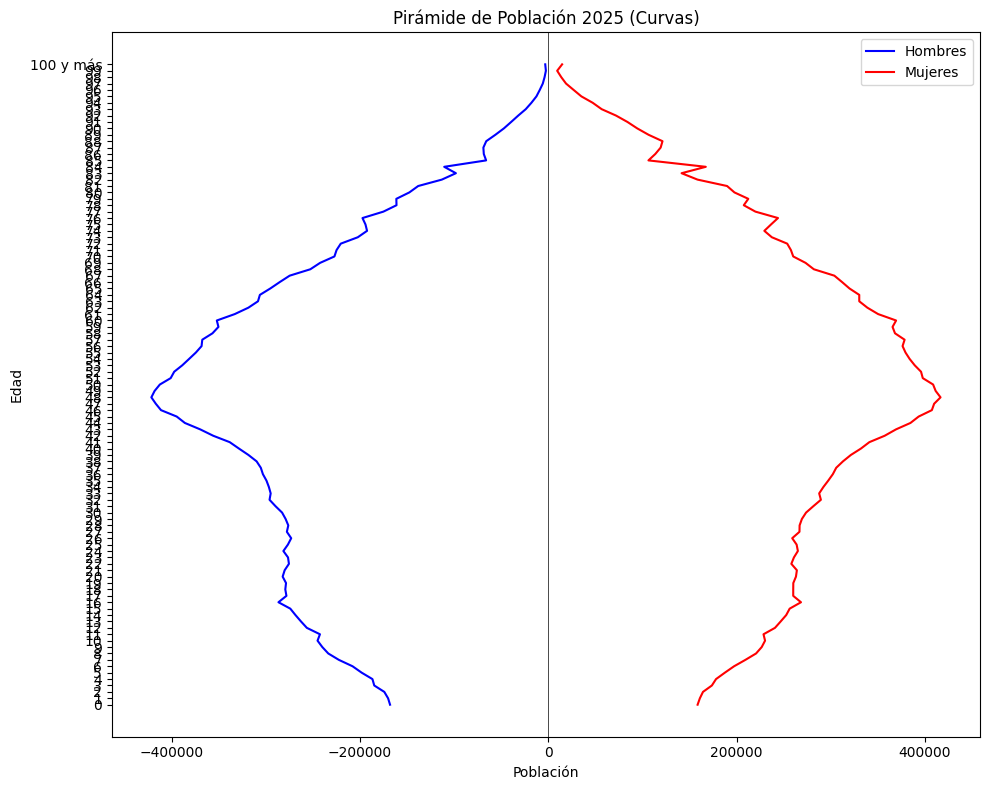

In [11]:
# Extract 2030 data
men_2030 = men_df['2030']
women_2030 = women_df['2030']

# Age groups as they are (youngest to oldest)
ages = men_2030.index
men_values = -men_2030.values  # Negative for left side
women_values = women_2030.values

# Plotting
plt.figure(figsize=(10, 8))

plt.plot(-men_2025.values, ages, color='blue', label='Hombres')   # Negative for left side
plt.plot(women_2025.values, ages, color='red', label='Mujeres')   # Positive for right side

plt.axvline(0, color='black', linewidth=0.5)  # Center line
plt.xlabel('Población')
plt.ylabel('Edad')
plt.title('Pirámide de Población 2025 (Curvas)')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


### Piràmide poblacional 2035


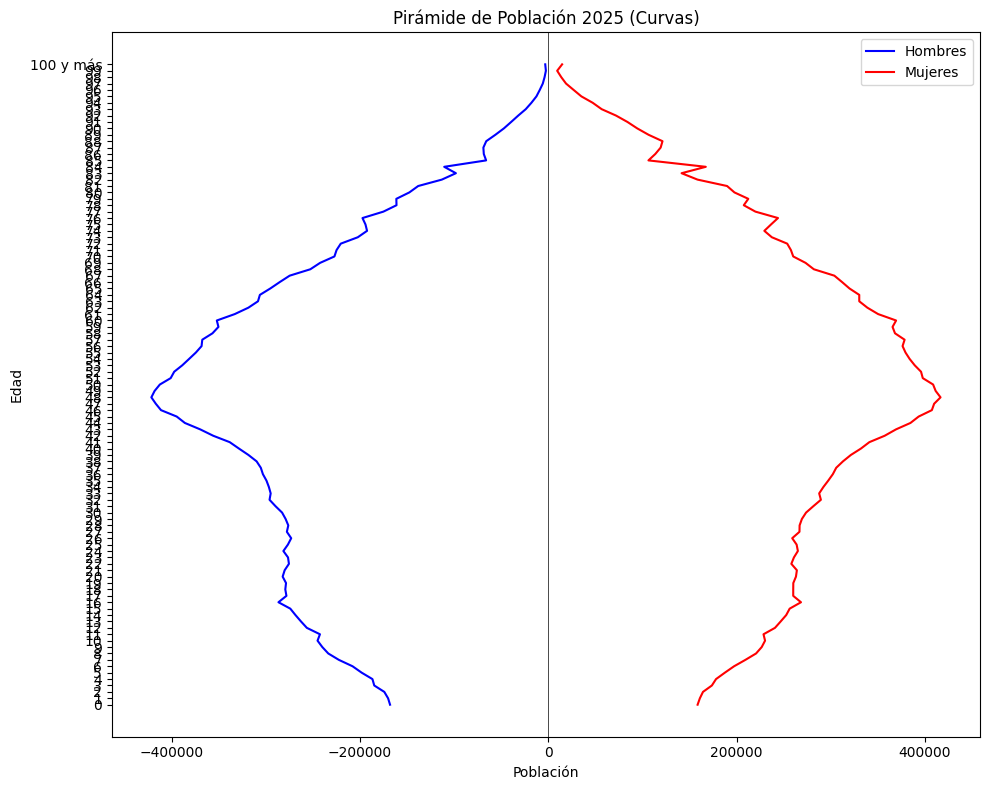

In [12]:
# Extract 2035 data
men_2035 = men_df['2035']
women_2035 = women_df['2035']

# Age groups as they are (youngest to oldest)
ages = men_2035.index
men_values = -men_2035.values  # Negative for left side
women_values = women_2035.values

# Plotting
plt.figure(figsize=(10, 8))

plt.plot(-men_2025.values, ages, color='blue', label='Hombres')   # Negative for left side
plt.plot(women_2025.values, ages, color='red', label='Mujeres')   # Positive for right side

plt.axvline(0, color='black', linewidth=0.5)  # Center line
plt.xlabel('Población')
plt.ylabel('Edad')
plt.title('Pirámide de Población 2025 (Curvas)')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

### Piràmide poblacional conjunta


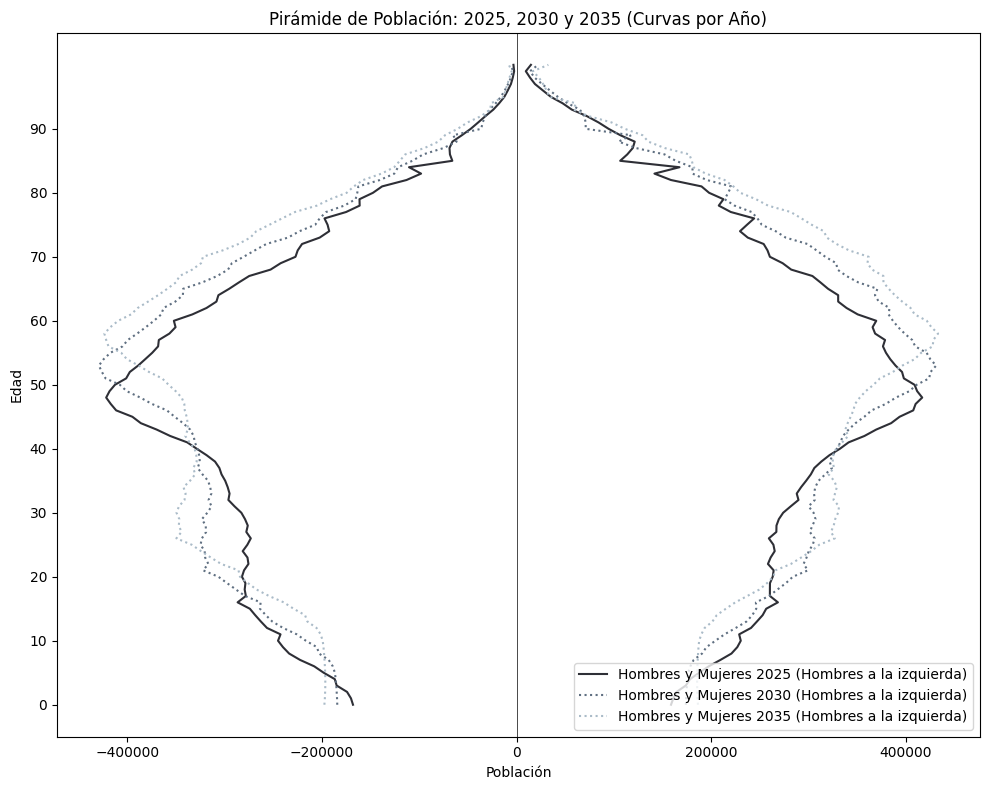

In [13]:

# Custom color palette
custom_palette = [ "#2E2F36", "#5F6F81","#AABBC8", "#2CCED1", "#DCE3EA",]



# Get age groups
ages = men_df.index

# Define years and line styles
years = ['2025', '2030', '2035']
linestyles = ['solid', 'dotted', 'dotted']

# Set up the plot
plt.figure(figsize=(10, 8))

# Plot each year's data
for i, (year, style) in enumerate(zip(years, linestyles)):
    color = custom_palette[i % len(custom_palette)]
    men = -men_df[year].values
    women = women_df[year].values

    plt.plot(men, ages, linestyle=style, color=color, label=f'Hombres y Mujeres {year} (Hombres a la izquierda)')
    plt.plot(women, ages, linestyle=style, color=color)  # Same color for women



# Formatting
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('Población')
plt.ylabel('Edad')
plt.title('Pirámide de Población: 2025, 2030 y 2035 (Curvas por Año)')

# Only show ticks every 10 years
age_ticks = [age for age in ages if str(age).isdigit() and int(age) % 10 == 0]
plt.yticks(age_ticks)

plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


age_group
18-34    24.5
35-44    17.4
45-54    21.1
55-64    18.4
65-79    18.7
Name: total, dtype: float64


/var/folders/tj/x1zxmcgd19nbm3pz04lp5pv40000gn/T/ipykernel_70402/3039974528.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_totals = population_2025.groupby('age_group')['total'].sum()


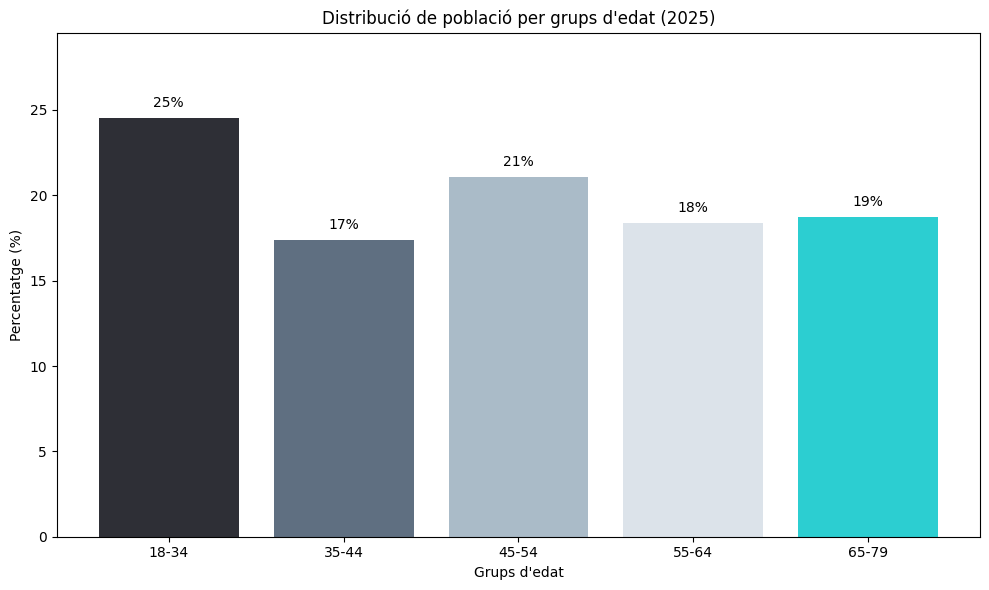

In [14]:


# Colors per grups d'edat
colors_grups_edat = ['#2E2F36', '#5F6F81', '#AABBC8', '#DCE3EA', '#2CCED1']

# Suposant que men_2025 i women_2025 ja estan carregats i són Series o DataFrames amb index edat

men_2025 = men_2025.reset_index().rename(columns={'index': 'age', '2025': 'men'})
women_2025 = women_2025.reset_index().rename(columns={'index': 'age', '2025': 'women'})

population_2025 = pd.merge(men_2025, women_2025, on='age', how='inner')
population_2025['total'] = population_2025['men'] + population_2025['women']

# Convertir a numèric
population_2025['age'] = pd.to_numeric(population_2025['age'], errors='coerce')
population_2025 = population_2025.dropna(subset=['age'])

# Definir intervals i etiquetes
bins = [18, 35, 45, 55, 65, 80]
labels = ["18-34", "35-44", "45-54", "55-64", "65-79"]

population_2025['age_group'] = pd.cut(population_2025['age'], bins=bins, labels=labels, right=False)

age_group_totals = population_2025.groupby('age_group')['total'].sum()
age_group_percent = 100 * age_group_totals / age_group_totals.sum()

print(age_group_percent.round(1))

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(age_group_percent.index, age_group_percent.values, color=colors_grups_edat)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, f"{height:.0f}%", ha='center', va='bottom')

ax.set_title("Distribució de població per grups d'edat (2025)")
ax.set_ylabel("Percentatge (%)")
ax.set_xlabel("Grups d'edat")
ax.set_ylim(0, age_group_percent.max() + 5)
plt.tight_layout()
plt.show()


Distribució per grups d'edat (2030):
age_group
18-34    25.5
35-44    16.1
45-54    19.6
55-64    18.9
65-79    19.9
Name: total, dtype: float64


/var/folders/tj/x1zxmcgd19nbm3pz04lp5pv40000gn/T/ipykernel_70402/65758004.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_totals = population.groupby('age_group')['total'].sum()


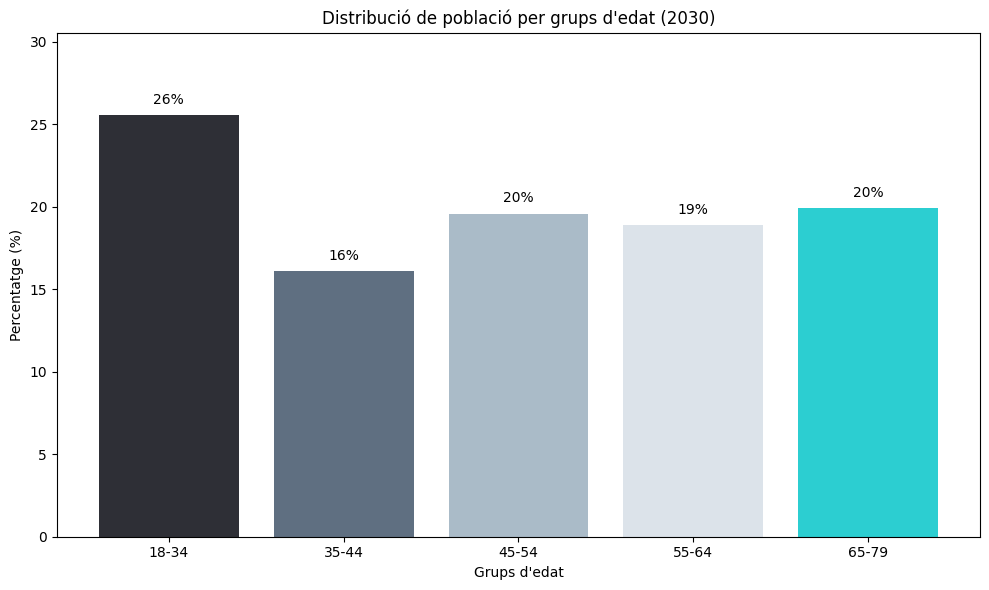

/var/folders/tj/x1zxmcgd19nbm3pz04lp5pv40000gn/T/ipykernel_70402/65758004.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_totals = population.groupby('age_group')['total'].sum()


Distribució per grups d'edat (2035):
age_group
18-34    25.4
35-44    15.8
45-54    17.4
55-64    19.5
65-79    21.9
Name: total, dtype: float64


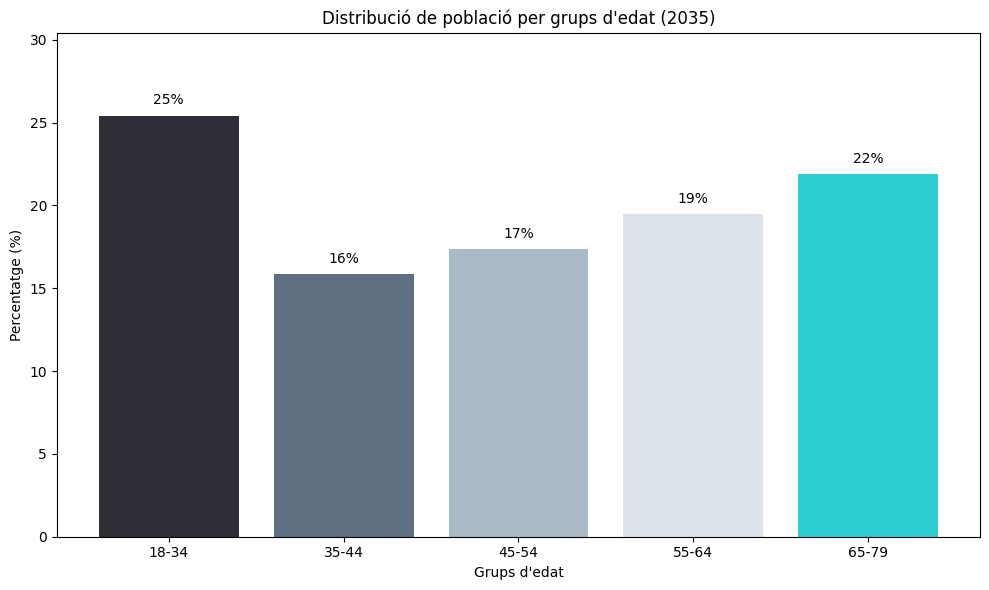

In [15]:
def plot_population_distribution(men_df, women_df, year, bins, labels, colors):
    # Preparar dades
    men = men_df.reset_index().rename(columns={'index': 'age', str(year): 'men'})
    women = women_df.reset_index().rename(columns={'index': 'age', str(year): 'women'})

    population = pd.merge(men, women, on='age', how='inner')
    population['total'] = population['men'] + population['women']

    population['age'] = pd.to_numeric(population['age'], errors='coerce')
    population = population.dropna(subset=['age'])

    population['age_group'] = pd.cut(population['age'], bins=bins, labels=labels, right=False)

    age_group_totals = population.groupby('age_group')['total'].sum()
    age_group_percent = 100 * age_group_totals / age_group_totals.sum()

    print(f"Distribució per grups d'edat ({year}):")
    print(age_group_percent.round(1))

    # Gràfic
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(age_group_percent.index, age_group_percent.values, color=colors)

    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, f"{height:.0f}%", ha='center', va='bottom')

    ax.set_title(f"Distribució de població per grups d'edat ({year})")
    ax.set_ylabel("Percentatge (%)")
    ax.set_xlabel("Grups d'edat")
    ax.set_ylim(0, age_group_percent.max() + 5)
    plt.tight_layout()
    plt.show()

# Cridar la funció per 2030 i 2035:
plot_population_distribution(men_2030, women_2030, 2030, bins, labels, colors_grups_edat)
plot_population_distribution(men_2035, women_2035, 2035, bins, labels, colors_grups_edat)


## Creixement dels rangs d'edat (2025 → 2030):



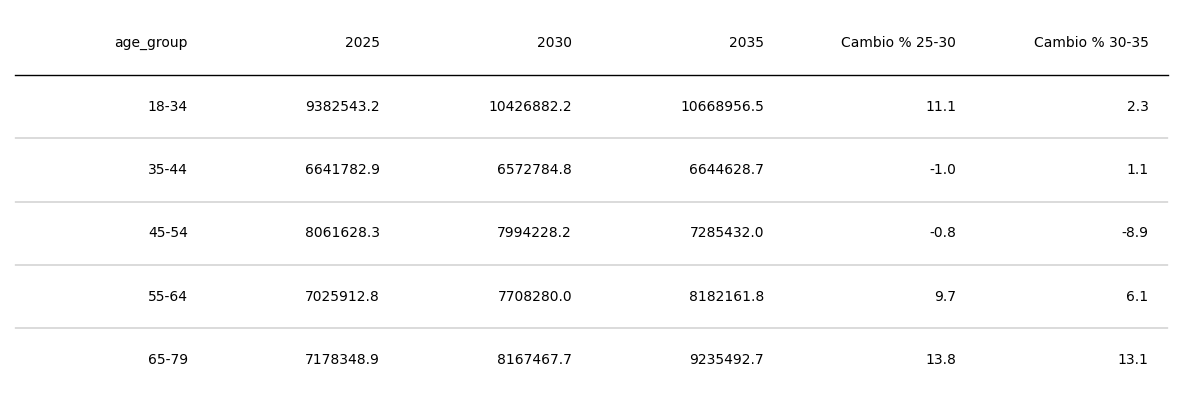

In [16]:
men_df = men_df.reset_index()
women_df = women_df.reset_index()

def assigna_franges(edat):
    try:
        edat_int = int(edat)
    except:
        if isinstance(edat, str) and '100' in edat:
            return "65-79"
        else:
            return None
    if 18 <= edat_int <= 34:
        return "18-34"
    elif 35 <= edat_int <= 44:
        return "35-44"
    elif 45 <= edat_int <= 54:
        return "45-54"
    elif 55 <= edat_int <= 64:
        return "55-64"
    elif 65 <= edat_int <= 79:
        return "65-79"
    else:
        return None

men_df["age_group"] = men_df["index"].apply(assigna_franges)
women_df["age_group"] = women_df["index"].apply(assigna_franges)

# Agrupar per edat i sumar per anys 2025, 2030 i 2035
men_grouped = men_df.groupby("age_group")[["2025", "2030", "2035"]].sum()
women_grouped = women_df.groupby("age_group")[["2025", "2030", "2035"]].sum()

INE_2025_2035 = men_grouped + women_grouped

# Calcular el canvi percentual 2025->2030
INE_2025_2035["Cambio % 25-30"] = 100 * (INE_2025_2035["2030"] - INE_2025_2035["2025"]) / INE_2025_2035["2025"]

# Opcional: també canvi percentual 2030->2035
INE_2025_2035["Cambio % 30-35"] = 100 * (INE_2025_2035["2035"] - INE_2025_2035["2030"]) / INE_2025_2035["2030"]

INE_2025_2035["Cambio % 25-30"] = INE_2025_2035["Cambio % 25-30"].round(1)
INE_2025_2035["Cambio % 30-35"] = INE_2025_2035["Cambio % 30-35"].round(1)

INE_2025_2035 = INE_2025_2035.round(1)

rangs_edat = ["18-34", "35-44", "45-54", "55-64", "65-79"]
INE_2025_2035 = INE_2025_2035.loc[rangs_edat]

# Mostrar taula
fig, ax = plt.subplots(figsize=(15, 5))
tab = Table(
    INE_2025_2035,
)


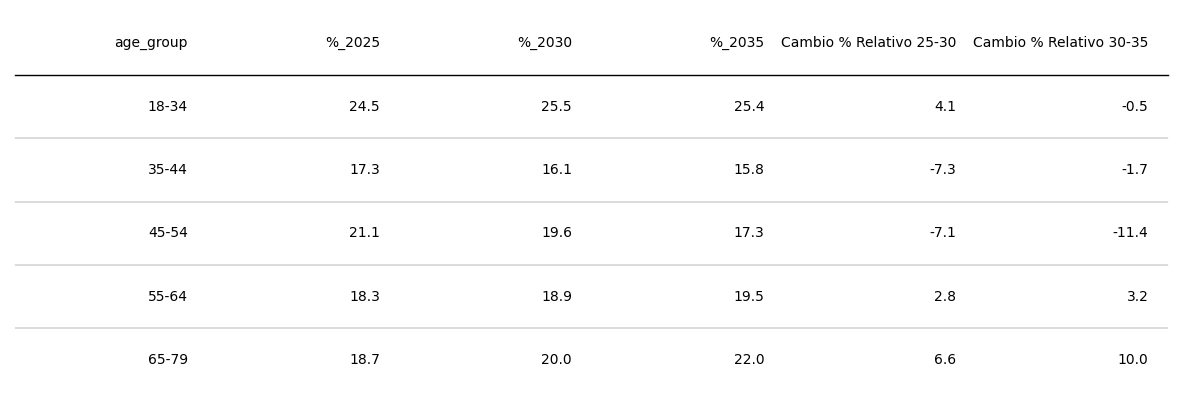

In [17]:
# Calculem el total població per any (suma de totes les franges)
total_2025 = INE_2025_2035["2025"].sum()
total_2030 = INE_2025_2035["2030"].sum()
total_2035 = INE_2025_2035["2035"].sum()

# Calculem el pes relatiu (%) de cada franja respecte al total per any
INE_2025_2035["%_2025"] = 100 * INE_2025_2035["2025"] / total_2025
INE_2025_2035["%_2030"] = 100 * INE_2025_2035["2030"] / total_2030
INE_2025_2035["%_2035"] = 100 * INE_2025_2035["2035"] / total_2035

# Canvi percentual en el pes relatiu entre 2025 i 2030
INE_2025_2035["Cambio % Relativo 25-30"] = 100 * (INE_2025_2035["%_2030"] - INE_2025_2035["%_2025"]) / INE_2025_2035["%_2025"]

# Canvi percentual en el pes relatiu entre 2030 i 2035
INE_2025_2035["Cambio % Relativo 30-35"] = 100 * (INE_2025_2035["%_2035"] - INE_2025_2035["%_2030"]) / INE_2025_2035["%_2030"]

# Arrodonim a 1 decimal
cols = ["%_2025", "%_2030", "%_2035", "Cambio % Relativo 25-30", "Cambio % Relativo 30-35"]
INE_2025_2035[cols] = INE_2025_2035[cols].round(1)

# Guardem el resultat amb només les columnes relatives i canvis
INE_2025_2035_relatiu = INE_2025_2035[cols]

# Mostrar taula
fig, ax = plt.subplots(figsize=(15, 5))
tab = Table(
    INE_2025_2035_relatiu,
)


In [21]:
INE_2025_2035_relatiu

%_2025  %_2030  %_2035  Cambio % Relativo 25-30  \
age_group                                                    
18-34        24.5    25.5    25.4                      4.1   
35-44        17.3    16.1    15.8                     -7.3   
45-54        21.1    19.6    17.3                     -7.1   
55-64        18.3    18.9    19.5                      2.8   
65-79        18.7    20.0    22.0                      6.6   

           Cambio % Relativo 30-35  
age_group                           
18-34                         -0.5  
35-44                         -1.7  
45-54                        -11.4  
55-64                          3.2  
65-79                         10.0

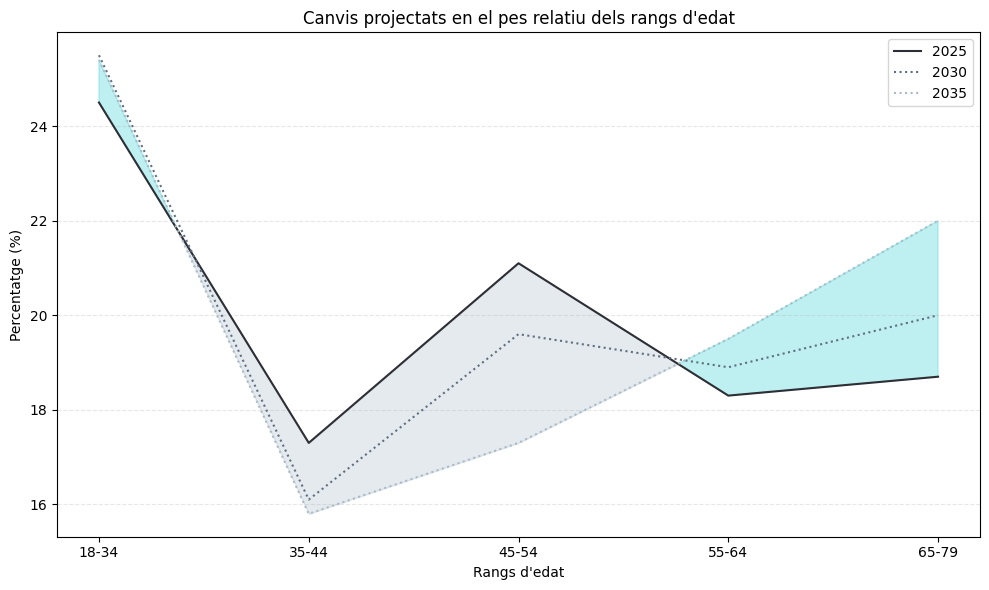

In [18]:
# Defineix la paleta de colors
custom_palette = ["#2E2F36", "#5F6F81", "#AABBC8", "#2CCED1", "#DCE3EA"]

# Franges d'edat
rangs_edat = INE_2025_2035_relatiu.index.tolist()

# Percentatges per a cada any
percent_2025 = INE_2025_2035_relatiu["%_2025"]
percent_2030 = INE_2025_2035_relatiu["%_2030"]
percent_2035 = INE_2025_2035_relatiu["%_2035"]

x = np.arange(len(rangs_edat))  # Posicions a l’eix X

fig, ax = plt.subplots(figsize=(10,6))

linestyles = ['solid', 'dotted', 'dotted']

# Dibuixem les línies amb linestyles personalitzats
ax.plot(x, percent_2025, label="2025", color=custom_palette[0], linestyle=linestyles[0], marker='')
ax.plot(x, percent_2030, label="2030", color=custom_palette[1], linestyle=linestyles[1], marker='')
ax.plot(x, percent_2035, label="2035", color=custom_palette[2], linestyle=linestyles[2], marker='')

# Pintem l'àrea quan 2025 està per sobre de 2035 amb gris (#AABBC8)
ax.fill_between(x, percent_2025, percent_2035, where=(percent_2025 >= percent_2035),
                color="#AABBC8", alpha=0.3, interpolate=True)

# Pintem l'àrea quan 2025 està per sota de 2035 amb color blau (#2CCED1)
ax.fill_between(x, percent_2025, percent_2035, where=(percent_2025 < percent_2035),
                color="#2CCED1", alpha=0.3, interpolate=True)

# Personalització
ax.set_xticks(x)
ax.set_xticklabels(rangs_edat)
ax.set_xlabel("Rangs d'edat")
ax.set_ylabel("Percentatge (%)")
ax.set_title("Canvis projectats en el pes relatiu dels rangs d'edat")
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


## Extrapolar tendències als nostres clients

In [19]:
# DataFrame manual dels nostres clients
distribucio_edat_clients = {
    'age_group': ['18-34', '35-44', '45-54', '55-64', '65-79'],
    'proportion': [35.496021831879155, 30.153361263789062, 19.78321866471922, 11.350270976669101, 3.2171272629434604]
}

distribucio_edat_clients = pd.DataFrame(distribucio_edat_clients)

distribucio_edat_clients 

age_group  proportion
0     18-34   35.496022
1     35-44   30.153361
2     45-54   19.783219
3     55-64   11.350271
4     65-79    3.217127

In [22]:

# Step 1: Client base (2025)
df_clients = pd.DataFrame({
    'age_group': ['18-34', '35-44', '45-54', '55-64', '65-79'],
    '2025': [35.496022, 30.153361, 19.783219, 11.350271, 3.217127]
}).set_index('age_group')

# Step 2: Relative changes in population
df_population_changes = pd.DataFrame({
    'age_group': ['18-34', '35-44', '45-54', '55-64', '65-79'],
    'Δ_25_30': [4.1, -7.3, -7.1, 2.8, 6.6],
    'Δ_30_35': [-0.5, -1.7, -11.4, 3.2, 10.0]
}).set_index('age_group')

# Step 3: Apply the changes to project client base
df_clients['2030'] = df_clients['2025'] * (1 + df_population_changes['Δ_25_30'] / 100)
df_clients['2035'] = df_clients['2030'] * (1 + df_population_changes['Δ_30_35'] / 100)

# Optional: Normalize to make sure proportions sum to 100%
df_clients = df_clients.div(df_clients.sum(axis=0), axis=1) * 100

# Final projected distribution
print(df_clients)


                2025       2030       2035
age_group                                 
18-34      35.496022  37.559954  38.163029
35-44      30.153361  28.412542  28.520578
45-54      19.783219  18.681309  16.901908
55-64      11.350271  11.860254  12.498802
65-79       3.217127   3.485941   3.915682


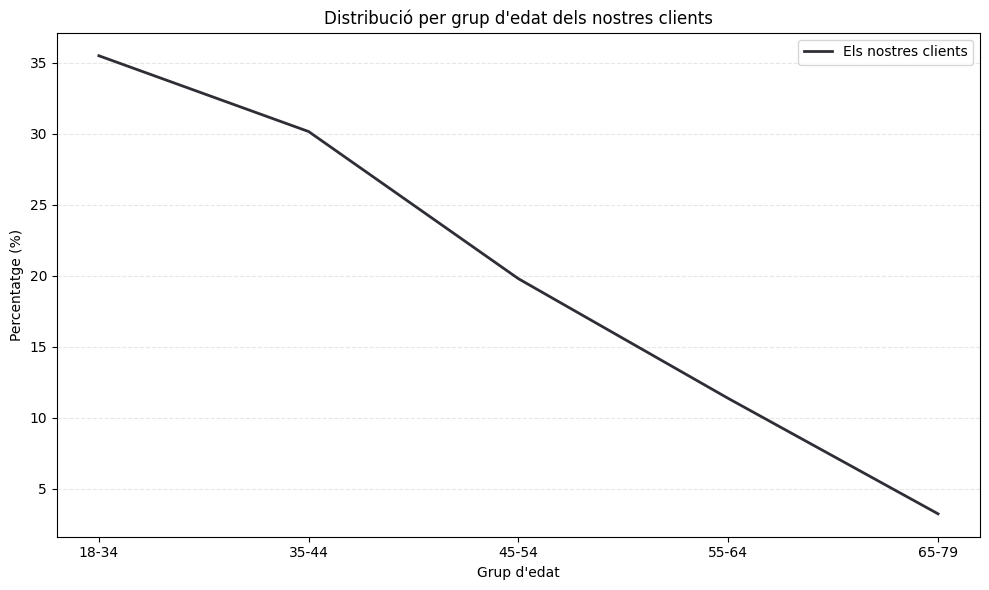

In [20]:

# Define palette and data
custom_palette = ["#2E2F36", "#5F6F81", "#AABBC8", "#2CCED1", "#DCE3EA"]

# Eix X: grups d’edat
x = np.arange(len(distribucio_edat_clients))
labels = distribucio_edat_clients['age_group']
values = distribucio_edat_clients['proportion']

# Crear figura
fig, ax = plt.subplots(figsize=(10, 6))

# Dibuixar la línia
ax.plot(x, values, label="Els nostres clients", color=custom_palette[0], linestyle='solid', linewidth=2)

# Etiquetes eix X
ax.set_xticks(x)
ax.set_xticklabels(labels)

# Estètica general
ax.set_xlabel("Grup d'edat")
ax.set_ylabel("Percentatge (%)")
ax.set_title("Distribució per grup d'edat dels nostres clients")
ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.legend()
plt.tight_layout()
plt.show()


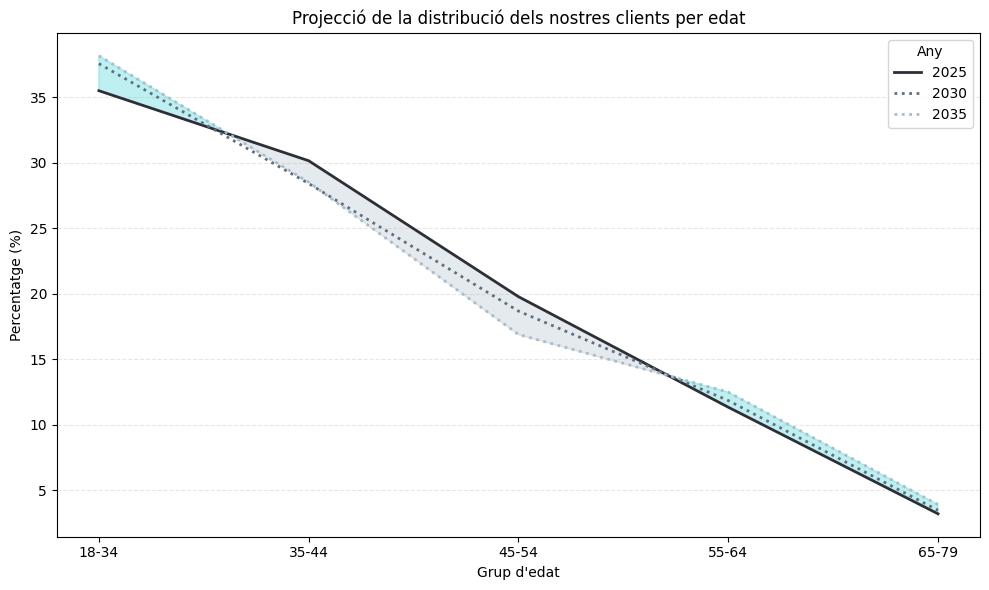

In [24]:


# Custom palette and linestyles
custom_palette = ["#2E2F36", "#5F6F81", "#AABBC8"]
linestyles = ['solid', 'dotted', 'dotted']

# Prepare x and labels
age_groups = df_clients.index.tolist()
x = np.arange(len(age_groups))

# Extract values for each year
values_2025 = df_clients['2025']
values_2030 = df_clients['2030']
values_2035 = df_clients['2035']

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each line
ax.plot(x, values_2025, label="2025", color=custom_palette[0], linestyle=linestyles[0], linewidth=2)
ax.plot(x, values_2030, label="2030", color=custom_palette[1], linestyle=linestyles[1], linewidth=2)
ax.plot(x, values_2035, label="2035", color=custom_palette[2], linestyle=linestyles[2], linewidth=2)



# Optional: fill between 2025 and 2035
ax.fill_between(x, values_2025, values_2035, where=(values_2025 >= values_2035),
                color=custom_palette[2], alpha=0.3, interpolate=True)
ax.fill_between(x, values_2025, values_2035, where=(values_2025 < values_2035),
                color="#2CCED1", alpha=0.3, interpolate=True)

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(age_groups)
ax.set_xlabel("Grup d'edat")
ax.set_ylabel("Percentatge (%)")
ax.set_title("Projecció de la distribució dels nostres clients per edat")
ax.legend(title="Any")
ax.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()
